In [1]:
%load_ext autoreload

%autoreload 2

import numpy as np
from lucifex.fdm import AB2, CN
from lucifex.sim import run, xdmf_to_npz
from lucifex.utils import grid, spacetime_grid, cross_section, maximum
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.io import write

from model.dns import dns_system_a


STORE = 1
WRITE = None
DIR_BASE = './data_test'
DIR_PARAMS = ('Nx', 'Ny')

sr = 0.2
simulation = dns_system_a(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
    dir_timestamp=True,
)(
    Nx=200,
    Ny=200,
    Ra=2e3,
    Da=100.0,
    epsilon=1e-2,
    sr=sr,
    cr=1.0,
    s_limits=(0, sr),
    c_seed=(567, 765),
    c_limits=(0, 1),
    c_stabilization=None,
    secondary=True,
)

n_stop = 1000
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)
if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

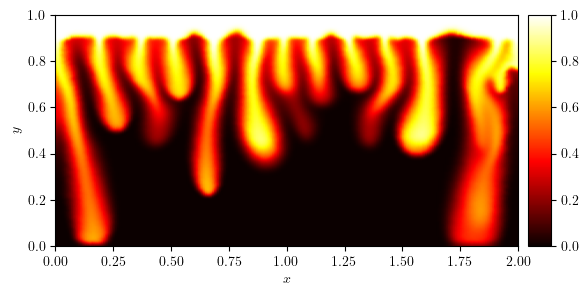

In [38]:
c = simulation['c']
plot_colormap(c.series[-100])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

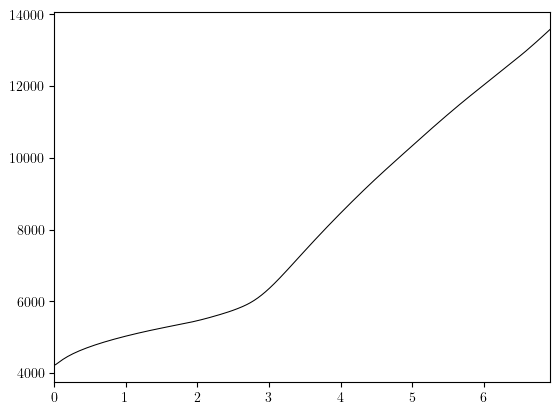

In [25]:
plot_line(
    (c.time_series, [np.sum(i) for i in c.dofs_series])
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

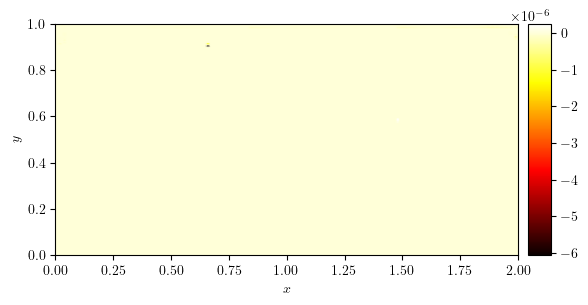

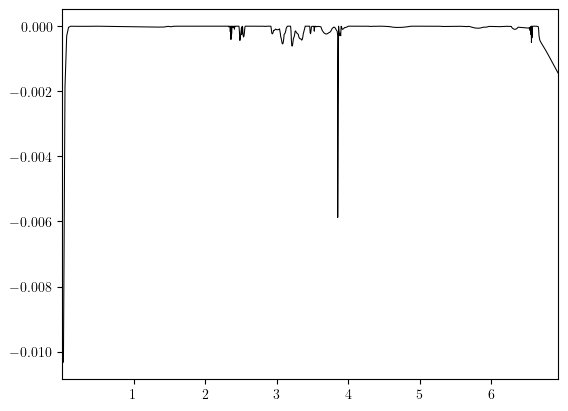

In [42]:
cCorr = simulation['cCorr']
plot_colormap(cCorr.series[500])
plot_line(
    (cCorr.time_series, [np.min(i) for i in cCorr.dofs_series]),
)

In [5]:
c, s, u, psi = simulation['c', 's', 'u', 'psi']
mC, mD = simulation['mC', 'mD']
dt, dtCFL, dtK = simulation['dt', 'dtCFL', 'dtK']
sMinMax, cMinMax, uMinMax = simulation['sMinMax', 'cMinMax', 'uMinMax']
f, fBoundary = simulation['f', 'fBoundary']
fInterface = f.sub(0)
fPlus = f.sub(1)
fMinus = f.sub(2)

In [44]:
uMax = uMinMax.sub(1)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

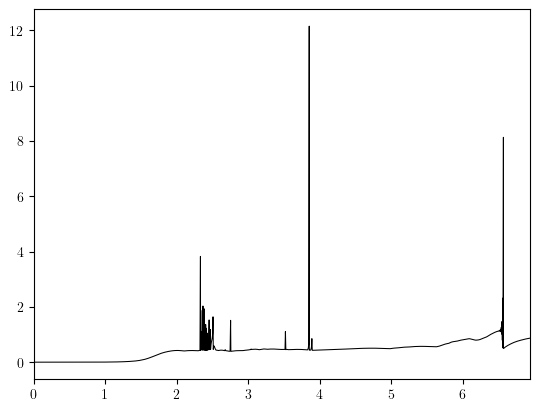

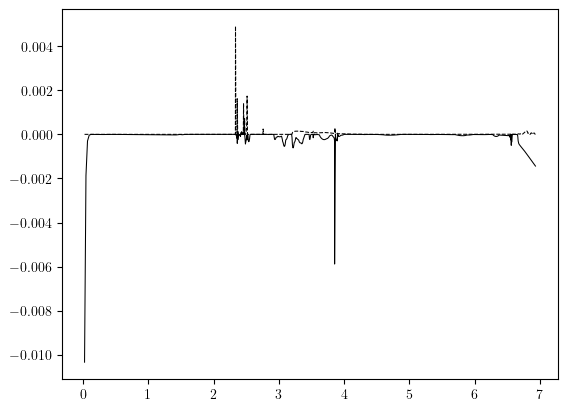

In [47]:
plot_line(
    (uMax.time_series, uMax.value_series)
)
plot_line(
   [(cCorr.time_series, [np.min(i) for i in cCorr.dofs_series]),
     (cCorr.time_series, [np.max(i) for i in cCorr.dofs_series])]
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

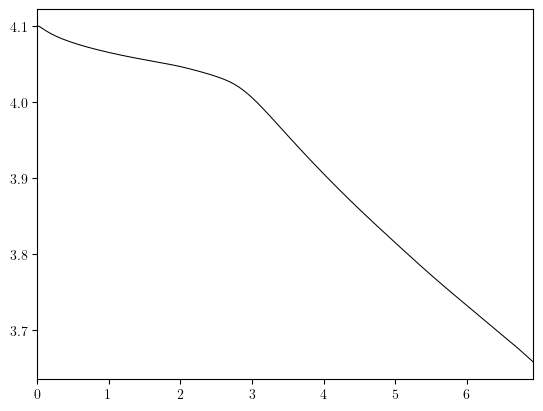

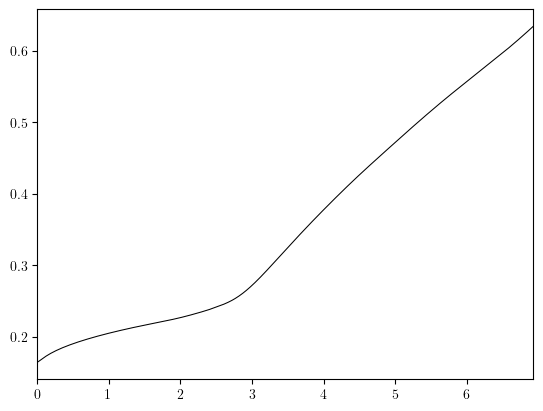

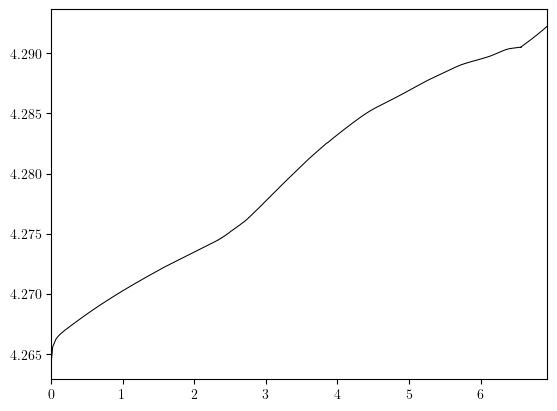

In [24]:
plot_line(
    (mC.time_series, mC.value_series)
)
plot_line(
    (mD.time_series, mD.value_series)
)
plot_line(
    (mC.time_series, [i + j for i, j in zip(mC.value_series, mD.value_series)])
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

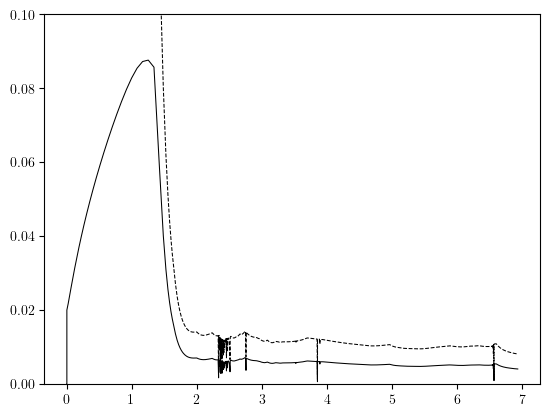

In [14]:
plot_line([
    (dt.time_series, dt.value_series),
    (dtCFL.time_series, dtCFL.value_series),
    (dtK.time_series, dtK.value_series),
    ],
    y_lims=(0, 0.1),
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

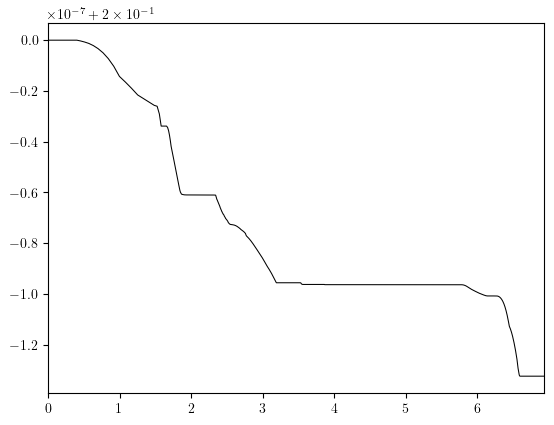

In [19]:
plot_line((sMinMax.time_series, [i[1] for i in sMinMax.value_series]))

(<Figure size 640x480 with 1 Axes>, <Axes: >)

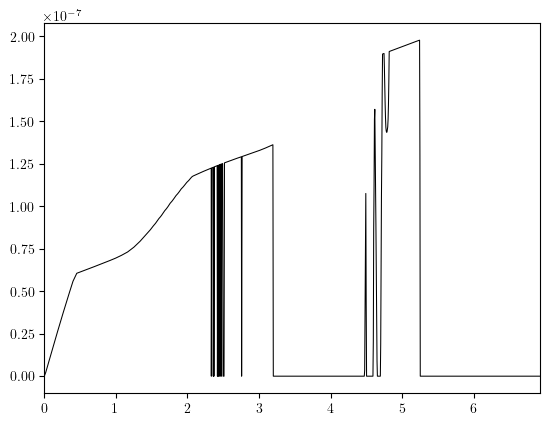

In [40]:
plot_line((cMinMax.time_series, [i[0] for i in cMinMax.value_series]))

In [43]:
from model.dns import interfacial_flux


interfacial_flux(c, ..., ..., 0.9, ...)

179 0.895


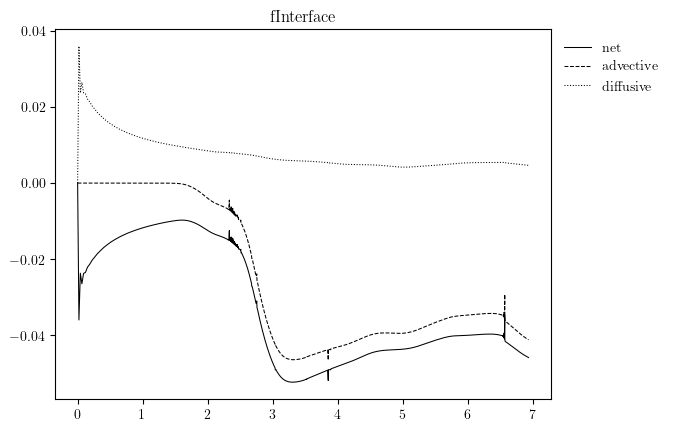

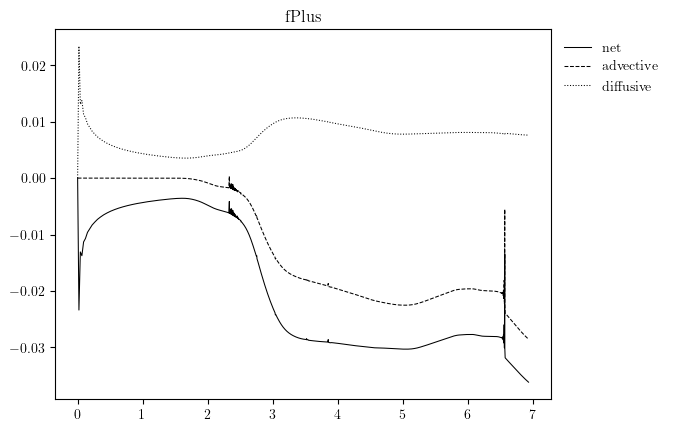

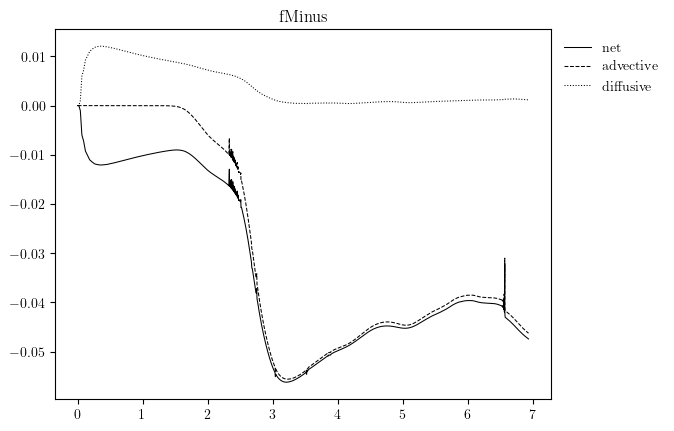

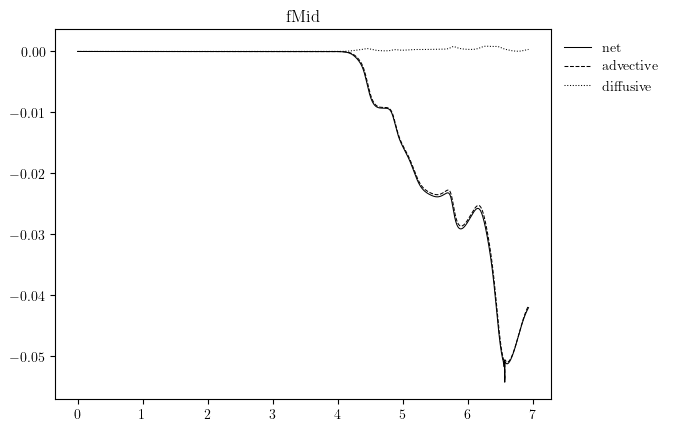

In [41]:
for flux in f.split():
    flux_net = [f[0] - f[1] for f in flux.value_series]
    plot_line(
        [(flux.time_series, flux_net), (flux.time_series, flux.value_series)], 
        title=f'{flux.name}', 
        cyc='black',
        legend_labels=['net', 'advective', 'diffusive'],
    )

In [ ]:
for i in (0, 1, -1):
    fig, ax = plot_colormap(c.series[i])